### Step 1
read Data

In [63]:
import pandas as pd

class DataSet:
    def __init__(self, RawX=None, X=None, Y=None, File=None):
        self.RawX = RawX
        self.X = X
        self.Y = Y
        self.File = File

trainSet = DataSet(File="assets/adult_train.csv")
testSet = DataSet(File="assets/adult_test.csv")
datasets = [trainSet, testSet]

for dset in datasets:
    csvdat = pd.read_csv(dset.File)
    data_shuffled = csvdat.sample(frac=1.0, random_state=0)
    
    dset.RawX = data_shuffled.drop('target', axis=1)
    dset.Y = data_shuffled['target']

In [64]:
# Train Preview
print(trainSet.Y.head())
trainSet.RawX.head()

22278    <=50K
8950     <=50K
7838     <=50K
16505    <=50K
19140     >50K
Name: target, dtype: object


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22278,49,Local-gov,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
8950,49,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0,0,40,United-States
7838,31,Private,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
16505,53,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States
19140,30,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


### Step 2
Dict Vectorizer

In [65]:
from sklearn.feature_extraction import DictVectorizer
import json
 
xTrainRecords = trainSet.RawX.to_dict("records")
vectorizer = DictVectorizer(sparse=False)
xTrainEncoded = vectorizer.fit_transform(xTrainRecords)

testDict = testSet.RawX.to_dict("records")
testFit = vectorizer.transform(testDict)
testUnVectorized = vectorizer.inverse_transform(testFit)

print("As Dict", json.dumps(testDict[0], indent = 4))
print("Unvectorized ", json.dumps(testUnVectorized[0], indent = 4))

As Dict {
    "age": 44,
    "workclass": "Private",
    "education": "Some-college",
    "education-num": 10,
    "marital-status": "Married-civ-spouse",
    "occupation": "Transport-moving",
    "relationship": "Husband",
    "race": "White",
    "sex": "Male",
    "capital-gain": 0,
    "capital-loss": 0,
    "hours-per-week": 48,
    "native-country": "United-States"
}
Unvectorized  {
    "age": 44.0,
    "education-num": 10.0,
    "education=Some-college": 1.0,
    "hours-per-week": 48.0,
    "marital-status=Married-civ-spouse": 1.0,
    "native-country=United-States": 1.0,
    "occupation=Transport-moving": 1.0,
    "race=White": 1.0,
    "relationship=Husband": 1.0,
    "sex=Male": 1.0,
    "workclass=Private": 1.0
}


In [66]:
#Data to dictionary
for dset in datasets:
    dset.X = dset.RawX.to_dict("records")

### Step 3
pipelining it

In [67]:
import sklearn as sk
from sklearn import tree
from sklearn.pipeline import make_pipeline
  
task1pipeline = sk.pipeline.make_pipeline(
  DictVectorizer(sparse=False),
  sk.tree.DecisionTreeClassifier()
)

task1pipeline.fit(trainSet.X, trainSet.Y)

Pipeline(steps=[('dictvectorizer', DictVectorizer(sparse=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [68]:
#Test pipeline
from sklearn.model_selection import cross_val_score
from statistics import mean

scores = cross_val_score(task1pipeline, trainSet.X, trainSet.Y)
mean(scores)

0.8189861158424032

In [69]:
# Peek Results
from IPython.display import display

testRawXCopy = testSet.RawX.copy()

testRawXCopy["result"] = testSet.Y
testRawXCopy["predict"] = task1pipeline.predict(testSet.X)

display(testRawXCopy)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result,predict
15729,44,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,48,United-States,>50K,<=50K
7077,37,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,50,United-States,<=50K,<=50K
14946,35,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K,<=50K
9416,38,State-gov,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K,>50K
5739,41,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,5013,0,30,United-States,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,71,?,HS-grad,9,Widowed,?,Unmarried,White,Female,6612,0,42,United-States,>50K,<=50K
3264,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,<=50K,>50K
9845,54,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,>50K
10799,44,Self-emp-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K,>50K


# Task 2: Decision trees and random forests


In [70]:
import sklearn as sk
import numpy as np

depth2fittedDecision = {}
depths = [2**i for i in range(15)]
print(f"depths={depths}")

for d in depths:
    depth2fittedDecision[d] = sk.pipeline.make_pipeline(
        DictVectorizer(sparse=False),
        sk.tree.DecisionTreeClassifier(max_depth=d)
    )
    depth2fittedDecision[d].fit(trainSet.X, trainSet.Y)

depths=[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


In [71]:
depth2accuracy = {}
for depth,pipe in depth2fittedDecision.items():
    predict = pipe.predict(testSet.X)
    depth2accuracy[depth] = sk.metrics.accuracy_score(predict, testSet.Y)

depth2accuracy

{1: 0.7637737239727289,
 2: 0.8306615072784227,
 4: 0.8447884036607088,
 8: 0.8568883975185799,
 16: 0.8430071862907684,
 32: 0.8213868926970088,
 64: 0.8182544069774584,
 128: 0.8185615134205516,
 256: 0.8183158282660771,
 512: 0.8180701431116025,
 1024: 0.8161660831644247,
 2048: 0.8182544069774584,
 4096: 0.8179473005343653,
 8192: 0.8154904489896198,
 16384: 0.8165960321847552}

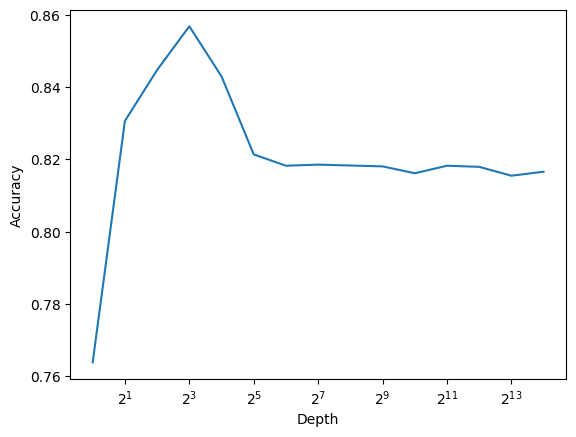

In [72]:
import matplotlib.pyplot as plt
d,acc = list(zip(*depth2accuracy.items()))
plt.xscale("log", base=2)
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.plot(d,acc)
plt.show()

We can see the accuracy decrease for depths higher than 8

In [76]:
from sklearn import ensemble

depth2fittedForest = {}

n_estimators = [2**i for i in range(12)]
for n_est in n_estimators:
    depth2fittedForest[n_est] = sk.pipeline.make_pipeline(
        DictVectorizer(sparse=False),
        sk.ensemble.RandomForestClassifier(n_estimators=n_est, n_jobs=-1)
    )
    depth2fittedForest[n_est].fit(trainSet.X, trainSet.Y)
    print(f"fitted:{n_est}")

n_eset2accuracy = {}
for n_est,pipe in depth2fittedForest.items():
    predict = pipe.predict(testSet.X)
    n_eset2accuracy[n_est] = sk.metrics.accuracy_score(predict, testSet.Y)

fitted:1
fitted:2
fitted:4
fitted:8
fitted:16
fitted:32


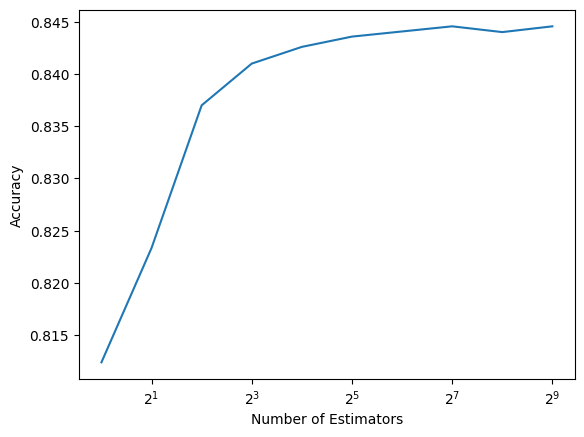

In [ ]:
import matplotlib.pyplot as plt
d,acc = list(zip(*n_eset2accuracy.items()))
plt.xscale("log", base=2)
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.plot(d,acc)
plt.show()